In [71]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_columns",None)

In [72]:
data=pd.read_csv("C:/users/daniel/documents/edureka/house prices/train.csv")

In [73]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [74]:
data.shape

(1460, 81)

In [75]:
null=[i for i in data.columns if data[i].isnull().sum()>0]
null_count=[(i,data[i].isnull().sum()) for i in data.columns if data[i].isnull().sum()>0]


In [76]:
cat_feat=[i for i in data.columns if data[i].dtypes == "O"]

data[cat_feat].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [77]:
count= [(i, len(data[i].unique())) for i in cat_feat ]

In [78]:
cnt_var= [(i,data[i].value_counts(dropna=False)) for i in cat_feat]

cnt_var

[('MSZoning',
  RL         1151
  RM          218
  FV           65
  RH           16
  C (all)      10
  Name: MSZoning, dtype: int64),
 ('Street',
  Pave    1454
  Grvl       6
  Name: Street, dtype: int64),
 ('Alley',
  NaN     1369
  Grvl      50
  Pave      41
  Name: Alley, dtype: int64),
 ('LotShape',
  Reg    925
  IR1    484
  IR2     41
  IR3     10
  Name: LotShape, dtype: int64),
 ('LandContour',
  Lvl    1311
  Bnk      63
  HLS      50
  Low      36
  Name: LandContour, dtype: int64),
 ('Utilities',
  AllPub    1459
  NoSeWa       1
  Name: Utilities, dtype: int64),
 ('LotConfig',
  Inside     1052
  Corner      263
  CulDSac      94
  FR2          47
  FR3           4
  Name: LotConfig, dtype: int64),
 ('LandSlope',
  Gtl    1382
  Mod      65
  Sev      13
  Name: LandSlope, dtype: int64),
 ('Neighborhood',
  NAmes      225
  CollgCr    150
  OldTown    113
  Edwards    100
  Somerst     86
  Gilbert     79
  NridgHt     77
  Sawyer      74
  NWAmes      73
  SawyerW   

In [79]:
null_cat=[i for i in cat_feat if i in null]

In [80]:
nullcat_cnt=[(i,data[i].value_counts(dropna=False)) for i in cat_feat if i in null]

In [81]:
nullcat_cnt

[('Alley',
  NaN     1369
  Grvl      50
  Pave      41
  Name: Alley, dtype: int64),
 ('MasVnrType',
  None       864
  BrkFace    445
  Stone      128
  BrkCmn      15
  NaN          8
  Name: MasVnrType, dtype: int64),
 ('BsmtQual',
  TA     649
  Gd     618
  Ex     121
  NaN     37
  Fa      35
  Name: BsmtQual, dtype: int64),
 ('BsmtCond',
  TA     1311
  Gd       65
  Fa       45
  NaN      37
  Po        2
  Name: BsmtCond, dtype: int64),
 ('BsmtExposure',
  No     953
  Av     221
  Gd     134
  Mn     114
  NaN     38
  Name: BsmtExposure, dtype: int64),
 ('BsmtFinType1',
  Unf    430
  GLQ    418
  ALQ    220
  BLQ    148
  Rec    133
  LwQ     74
  NaN     37
  Name: BsmtFinType1, dtype: int64),
 ('BsmtFinType2',
  Unf    1256
  Rec      54
  LwQ      46
  NaN      38
  BLQ      33
  ALQ      19
  GLQ      14
  Name: BsmtFinType2, dtype: int64),
 ('Electrical',
  SBrkr    1334
  FuseA      94
  FuseF      27
  FuseP       3
  Mix         1
  NaN         1
  Name: Electrical

In [82]:
data1=data.copy()
data2=data.copy()

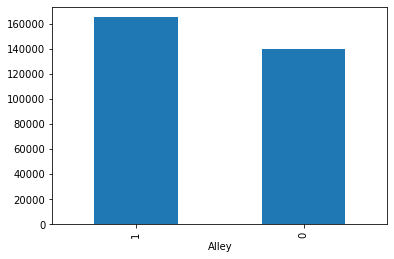

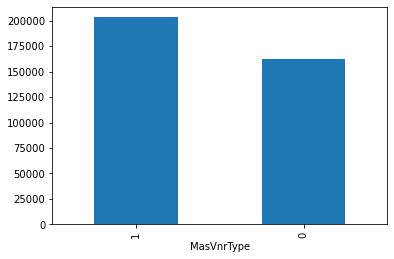

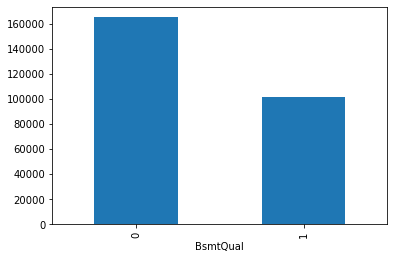

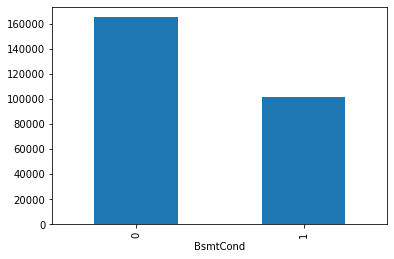

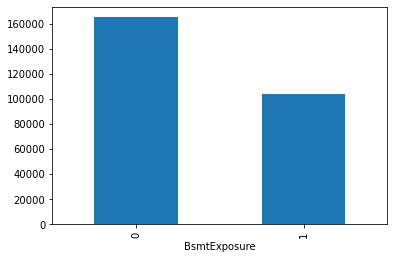

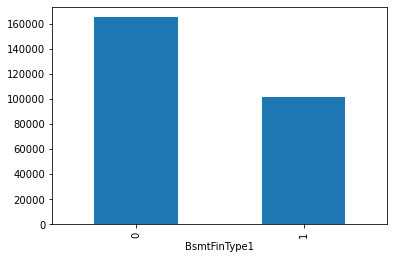

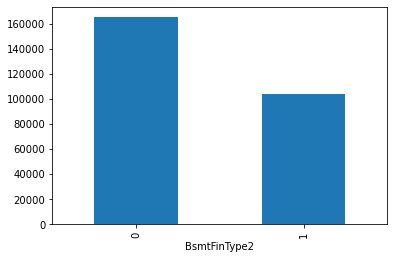

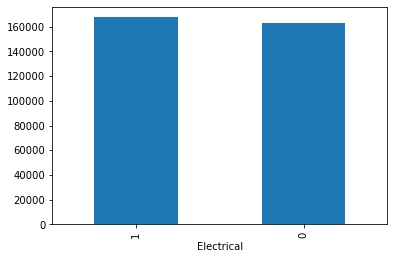

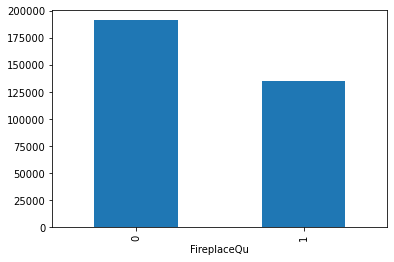

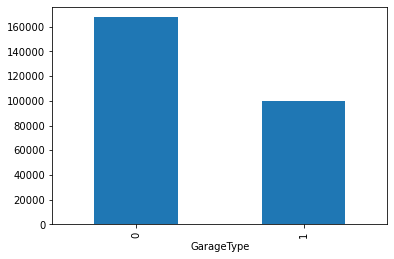

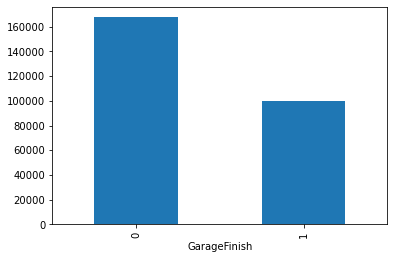

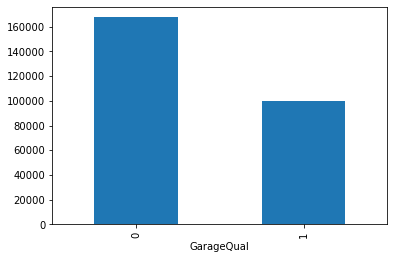

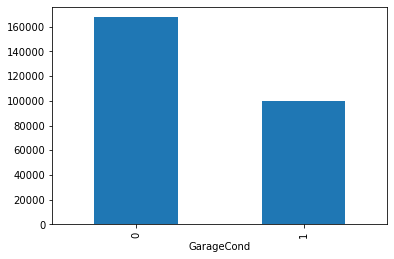

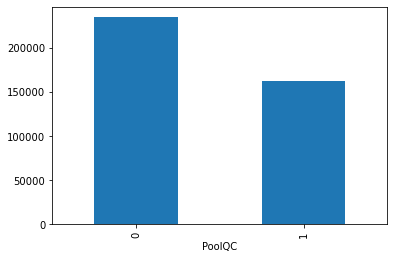

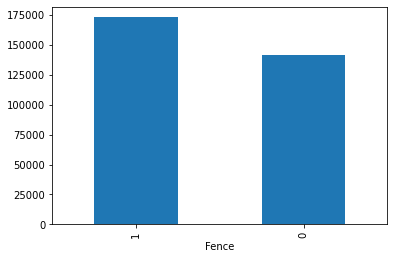

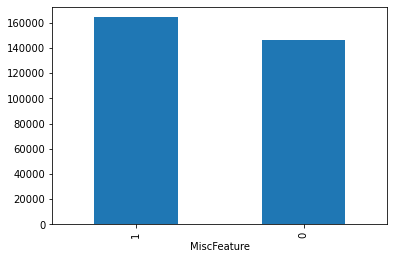

In [83]:
for i in null_cat:
    data1[i]=np.where(data1[i].isnull(),1,0)
    data1.groupby([i])["SalePrice"].median().sort_values(ascending=False).plot(kind="bar")
    plt.show()

In [84]:
for i in null_cat:
    data[i]=data[i].fillna("Missing")

In [85]:
for i in null_cat:
    print(data[i].value_counts())

Missing    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
Missing      8
Name: MasVnrType, dtype: int64
TA         649
Gd         618
Ex         121
Missing     37
Fa          35
Name: BsmtQual, dtype: int64
TA         1311
Gd           65
Fa           45
Missing      37
Po            2
Name: BsmtCond, dtype: int64
No         953
Av         221
Gd         134
Mn         114
Missing     38
Name: BsmtExposure, dtype: int64
Unf        430
GLQ        418
ALQ        220
BLQ        148
Rec        133
LwQ         74
Missing     37
Name: BsmtFinType1, dtype: int64
Unf        1256
Rec          54
LwQ          46
Missing      38
BLQ          33
ALQ          19
GLQ          14
Name: BsmtFinType2, dtype: int64
SBrkr      1334
FuseA        94
FuseF        27
FuseP         3
Mix           1
Missing       1
Name: Electrical, dtype: int64
Missing    690
Gd         380
TA         313
Fa          33
Ex          24
Po          20

In [86]:
for i in cat_feat:
    print(data[i].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Missing    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2


In [87]:
cathotcode=[i for i in cat_feat if len(data[i].unique())<10]

print(data[cathotcode].shape)
data[cathotcode].head()

(1460, 40)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,Gable,CompShg,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [88]:
catlabcode=[i for i in cat_feat if i not in cathotcode]

print(data[catlabcode].shape)
data[catlabcode].head()

(1460, 3)


,Neighborhood,Exterior1st,Exterior2nd
0,CollgCr,VinylSd,VinylSd
1,Veenker,MetalSd,MetalSd
2,CollgCr,VinylSd,VinylSd
3,Crawfor,Wd Sdng,Wd Shng
4,NoRidge,VinylSd,VinylSd


# Numerical Feature

In [89]:
num_feat = [i for i in data.columns if i not in cat_feat]

print(data[num_feat].shape)
data[num_feat].head()

(1460, 38)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [90]:
year_feat= [i for i in num_feat if "Year" in i or "Yr" in i]

data[year_feat].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [91]:
data4=data.copy()

In [92]:
for i in year_feat:
    if i =="YearBuilt":
        pass
    else:
        data4[i]=data4[i]-data4["YearBuilt"]

In [93]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [94]:
null_num=[i for i in num_feat if i in null]
data[null_num].head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


In [95]:
data3=data.copy()

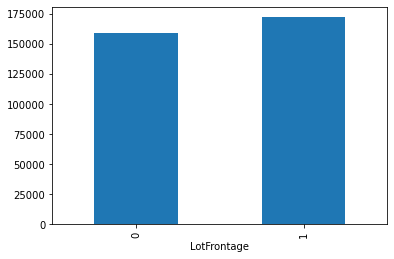

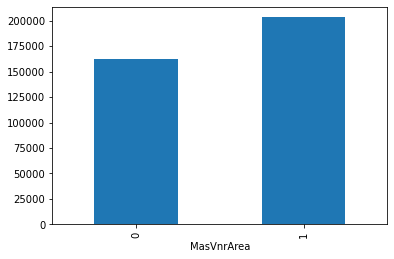

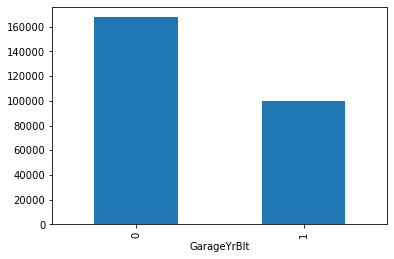

In [96]:
for i in null_num:
    data3[i]=np.where(data3[i].isnull(),1,0)
    
    data3.groupby([i])["SalePrice"].median().plot(kind="bar")
    plt.show()

In [97]:
for i in null_num:
    print(i,len(data[i]),len(data.loc[data[i].isnull()==True]))

LotFrontage 1460 259
MasVnrArea 1460 8
GarageYrBlt 1460 81


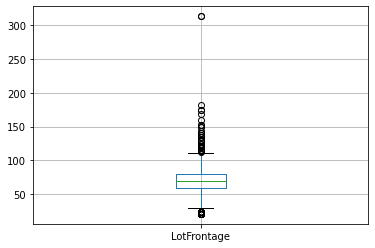

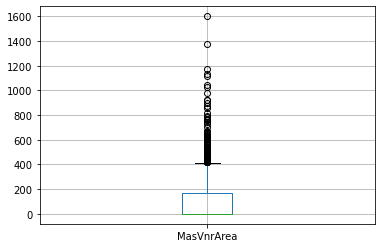

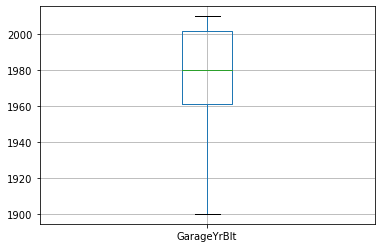

In [98]:
for i in null_num:
    data.boxplot(column=i)
    plt.show()

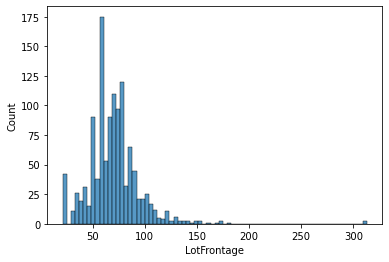

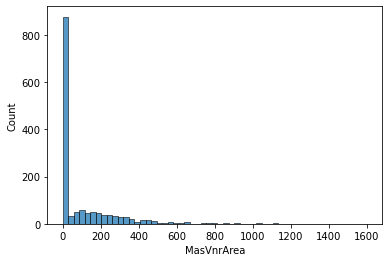

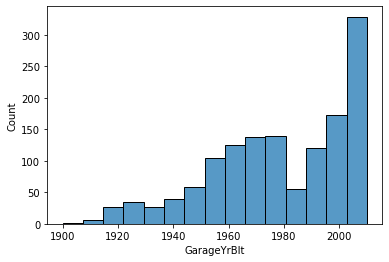

In [99]:
for i in null_num:
    sb.histplot(x=data[i])
    plt.show()

In [100]:
negval=[i for i in data4["GarageYrBlt"].unique() if i <0]

negval

[-7.0, -10.0, -6.0, -2.0, -1.0, -5.0]

In [101]:
for i in negval:
    if i in data4["GarageYrBlt"].unique():
        print(data4.loc[data4["GarageYrBlt"]==i,year_feat])


    YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
29       1927            23         -7.0      81
    YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
93       1910            88        -10.0      97
     YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
324       1967            40         -6.0      43
     YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
600       2005             0         -2.0       1
      YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
736        1950             0         -1.0      56
1414       1923            77         -1.0      85
1418       1963             0         -1.0      45
      YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
1103       1959             0         -5.0      47
1376       1930            20         -5.0      78


In [102]:
ind=[(data4.loc[data4["GarageYrBlt"]==i,year_feat].index) for i in negval if i in data4["GarageYrBlt"].unique()]


In [103]:
ind

[Int64Index([29], dtype='int64'),
 Int64Index([93], dtype='int64'),
 Int64Index([324], dtype='int64'),
 Int64Index([600], dtype='int64'),
 Int64Index([736, 1414, 1418], dtype='int64'),
 Int64Index([1103, 1376], dtype='int64')]

In [104]:
for i in ind:
    print(data.loc[i,year_feat])

    YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
29       1927          1950       1920.0    2008
    YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
93       1910          1998       1900.0    2007
     YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
324       1967          2007       1961.0    2010
     YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
600       2005          2005       2003.0    2006
      YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
736        1950          1950       1949.0    2006
1414       1923          2000       1922.0    2008
1418       1963          1963       1962.0    2008
      YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
1103       1959          1959       1954.0    2006
1376       1930          1950       1925.0    2008


In [105]:
for i in negval:
    data4["GarageYrBlt"]=np.where(data4["GarageYrBlt"]==i,0,data4["GarageYrBlt"])

<AxesSubplot:xlabel='GarageYrBlt'>

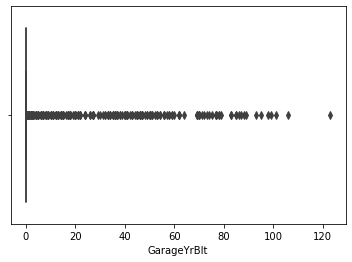

In [106]:
sb.boxplot(x=data4["GarageYrBlt"])

In [107]:
for i in year_feat:
    if i == "YearBuilt":
        pass
    else:
        data[i]=data[i]-data["YearBuilt"]

In [108]:
data[year_feat].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,0,0.0,5
1,1976,0,0.0,31
2,2001,1,0.0,7
3,1915,55,83.0,91
4,2000,0,0.0,8


In [109]:
neg_val=[j for i in year_feat for j in data[i].unique() if j<0]
neg_val

[-7.0, -10.0, -6.0, -2.0, -1.0, -5.0]

In [110]:
neg=[i for i in year_feat for j in data[i].unique() if j<0]
neg

['GarageYrBlt',
 'GarageYrBlt',
 'GarageYrBlt',
 'GarageYrBlt',
 'GarageYrBlt',
 'GarageYrBlt']

In [111]:
for i in neg:
    data["GarageYrBlt"]=np.where(data["GarageYrBlt"]==i,0,data["GarageYrBlt"])

In [112]:
data[null_num].head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,0.0
1,80.0,0.0,0.0
2,68.0,162.0,0.0
3,60.0,0.0,83.0
4,84.0,350.0,0.0


In [113]:
for i in null_num:
    data[i]=data[i].fillna(data[i].median())

In [114]:
for i in data.columns:
    print(data[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [115]:
#### category features



In [116]:
data[cat_feat].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [117]:
data[cathotcode].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,Gable,CompShg,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [118]:
data[catlabcode].head()

,Neighborhood,Exterior1st,Exterior2nd
0,CollgCr,VinylSd,VinylSd
1,Veenker,MetalSd,MetalSd
2,CollgCr,VinylSd,VinylSd
3,Crawfor,Wd Sdng,Wd Shng
4,NoRidge,VinylSd,VinylSd


In [119]:
for i in cat_feat:
    
    catrank=data.groupby([i])["SalePrice"].median().sort_values().index
    catmap={n:m for m,n in enumerate(catrank,0)}
    data[i]=data[i].map(catmap)

In [120]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,0,1,1,0,0,16,3,4,3,6,7,5,2003,0,1,2,11,13,2,196.0,2,4,5,3,3,1,6,706,4,0,150,856,5,4,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,5,0.0,2,2,548,4,5,2,0,61,0,0,0,0,0,4,2,0,2,5,5,4,208500
1,2,20,3,80.0,9600,1,1,0,1,1,2,0,19,1,4,3,4,6,8,1976,0,1,2,6,4,1,0.0,1,4,3,3,3,4,4,978,4,0,284,1262,5,4,1,5,1262,0,0,1262,0,1,2,0,3,1,1,6,6,1,3,5,0.0,2,2,460,4,5,2,298,0,0,0,0,0,0,4,2,0,5,31,5,4,181500
2,3,60,3,68.0,11250,1,1,1,1,1,0,0,16,3,4,3,6,7,5,2001,1,1,2,11,13,2,162.0,2,4,5,3,3,2,6,486,4,0,434,920,5,4,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,3,5,0.0,2,2,608,4,5,2,0,42,0,0,0,0,0,4,2,0,9,7,5,4,223500
3,4,70,3,60.0,9550,1,1,1,1,1,1,0,18,3,4,3,6,7,5,1915,55,1,2,5,3,1,0.0,1,4,1,2,4,1,4,216,4,0,540,756,5,3,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,4,2,83.0,1,3,642,4,5,2,0,35,272,0,0,0,0,4,2,0,2,91,5,1,140000
4,5,60,3,84.0,14260,1,1,1,1,1,2,0,23,3,4,3,6,8,5,2000,0,1,2,11,13,2,350.0,2,4,5,3,3,3,6,655,4,0,490,1145,5,4,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,5,0.0,2,3,836,4,5,2,192,84,0,0,0,0,0,4,2,0,12,8,5,4,250000


In [121]:
data.shape

(1460, 81)

In [122]:
data["SaleCondition"].head()

0    4
1    4
2    4
3    1
4    4
Name: SaleCondition, dtype: int64

In [123]:
data1["SaleCondition"].head()

0     Normal
1     Normal
2     Normal
3    Abnorml
4     Normal
Name: SaleCondition, dtype: object

In [124]:
data["SaleCondition"].value_counts()

4    1198
5     125
1     101
2      20
3      12
0       4
Name: SaleCondition, dtype: int64

In [125]:
data1["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [126]:
#### Feature Selection

In [127]:
x=data.drop(columns="SalePrice")
x.shape

(1460, 80)

In [128]:
y=data["SalePrice"]

In [129]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [130]:
from sklearn.feature_selection import SelectFromModel,SelectKBest,mutual_info_regression,chi2

In [131]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split

In [132]:
#trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.25,random_state=5)

In [133]:
#trainx.shape,testx.shape,trainy.shape,testy.shape

In [134]:
#feat=SelectFromModel(rfr)

In [135]:
#feat.fit(trainx,trainy)

In [136]:
#trainx.columns[feat.get_support()]

In [137]:
#trainx.columns[feat.get_support()].shape

In [138]:
#trainx.columns

In [139]:
#feat2=mutual_info_regression(trainx,trainy)

In [140]:

#pd.set_option("display.max_rows",None)

#pd.DataFrame(feat2,index=trainx.columns).sort_values(0,ascending=False)